In [24]:
pip install -U spacy

In [25]:
!spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 179 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
import spacy
from spacy.tokenizer import Tokenizer
#Once you have a GPU-enabled installation, the best way to activate it is to call 
spacy.prefer_gpu()

# Write code here to load spaCy for french
spacy_nlp = spacy.load("en_core_web_sm")

In [27]:
spacy_nlp = spacy.load("en_core_web_sm")

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.compose import ColumnTransformer


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from scipy.stats import skew
import plotly.express as px

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
train_df = pd.read_csv('/content/drive/MyDrive/Ensemble Learning/Tweets/df_all_features_tfidf.csv', index_col=0)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,muslim,gay,round,good,radical,bad,mkr,rape,stupid,lot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208295,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


## Run below cells only if you don't have the tfidf already (it should be on the df_all_tweets_tfidf.csv file)

In [ ]:
def raw_to_tokens(raw_string, spacy_nlp):
    
    # Write code for lower-casing
    string = raw_string.lower()
    
       
    # Write code to tokenize
    spacy_tokens = spacy_nlp(string)
        
    # Write code to remove punctuation tokens and create string tokens
    string_tokens = [token.orth_ for token in spacy_tokens if (token.is_punct == False) and ( token.is_stop == False)]
    
    # Write code to join the tokens back into a single string
    clean_string = " ".join(string_tokens)
    
    return clean_string

In [ ]:
counter = 0
cleaned_tweets = []
for index, row in train_df.iterrows():
  cleaned_tweets.append(raw_to_tokens(row['tweet_text'], spacy_nlp))
  counter += 1
  if counter % 5000 == 0: print(counter)

In [ ]:
train_df['tweet_text'] = cleaned_tweets

In [ ]:
train_df.head()

,tweet_text,cyberbullying_type,characters per tweet,words_per_tweet,nb_upper,nb_lower,nb_capitalized,mixed_upper_lower_not_capitalized,nb_len_1,nb_len_2,...,muslim,gay,round,good,radical,bad,mkr,rape,stupid,lot
0,words katandandre food crapilicious mkr,not_cyberbullying,61,9,0,8,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,115,14,1,9,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
2,@xochitlsuckkks classy whore red velvet cupcakes,not_cyberbullying,60,9,0,7,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,@jason_gio meh :p thanks heads concerned ang...,not_cyberbullying,103,18,1,16,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,@rudhoeenglish isis account pretending kurdish...,not_cyberbullying,103,18,1,12,4,0,1,6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Write code to convert the list of documents to list of tokens.


# Write code to create a TfidfVectorizer object
tfidf = TfidfVectorizer(max_features = 1000)


# Write code to vectorize the sample text
X_tfidf = tfidf.fit_transform(train_df['tweet_text'])


from scipy import sparse

#sparse.save_npz("/content/drive/MyDrive/Ensemble Learning/Labs/X_tfidf.npz", X_tfidf)

In [ ]:
from scipy import sparse
X_tfidf = sparse.load_npz("/content/drive/MyDrive/Ensemble Learning/Labs/X_tfidf.npz")

In [ ]:
X_tfidf.shape

(47692, 60068)

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.head()

In [ ]:
df = pd.concat([X_tfidf_df,train_df], axis = 1)
print(df.shape)
df.head()

There are 6 main classes that we aim to predict and they are all evenly distributed in the dataset

In [ ]:
fig = px.bar(train_df.cyberbullying_type.value_counts(), color_discrete_sequence=px.colors.qualitative.Pastel1, custom_data=[train_df.cyberbullying_type.value_counts()])
fig.update_traces(hovertemplate='<br><b>Total: </b>%{customdata[0]}')
fig.update_layout(title='Cyberbullying types',
                 template='simple_white',
                 hovermode='x unified',
                 xaxis=dict(title='Type'),
                 yaxis=dict(title='Count'),
                 showlegend=False)
fig.show()

##Run from here

In [31]:
#train_df = df
train_y = train_df[['cyberbullying_type']]
train_x = train_df.drop(['cyberbullying_type','tweet_text'], axis = 1)


In [9]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,muslim,gay,round,good,radical,bad,mkr,rape,stupid,lot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208295,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [32]:
## transforming the y column so that it works with the rest of the model
train_y = np.array(train_y)
train_y = np.transpose(train_y)
train_y = train_y.ravel()

In [33]:
## the number of numerical features
num_features_count = 76

## extract the column names from the dataframe.
train_x_columns = list(train_x.columns)

##selecting which columns are categorical and which are numeric.
numerical_columns = train_x_columns[0:train_x.shape[1] - num_features_count]
categorical_columns = train_x_columns[:-num_features_count]

In [34]:
## splitting the training data into a training set (80%) and a test set (20%)
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=0)

In [35]:
## set this to true if transformations should be applied
transform = False

if transform == True:
    for k in numerical_columns:
        ## these parameter specify the skewness thresholds for transformations
        ## these were changed to investigate the impact
        skew_sqrt = 2
        skew_log = 5
        temp_skew = round(skew(train_x[k]),3)
        if temp_skew > skew_sqrt:
            train_x[k] = np.sqrt(train_x[k])
            trans_skew = round(skew(np.sqrt(train_x[k])),3)
        if temp_skew > skew_log:
            train_x[k] = np.log(1+train_x[k])
            trans_skew = round(skew(np.log(1+train_x[k])),3)
        else:
            trans_skew = temp_skew
        
        print(k, temp_skew, trans_skew)

## the results of the datatransformations had a neglible impact on the final results (f1 score incr of 0.02)
## as such, the transformations have not been considered further.

In [36]:
## selecting the features to use (numberic and categorical) - also seletcs how to fill in missing data and how to scale data
numeric_features = numerical_columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_features = categorical_columns

## how to handle missing data and also to use onehot encoder for categorical variables.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


## creating a preprocessor to combine the categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [43]:
## different models to use 
def model(choice):
    
    if choice == 'AB':
        return AdaBoostClassifier(n_estimators=100, random_state=0)
    if choice == 'DT':
        return DecisionTreeClassifier(random_state=0)
    if choice == 'BG':
        return BaggingClassifier(base_estimator=SVC(),n_estimators=2, random_state=0)
    if choice == 'RF':
        return RandomForestClassifier(max_depth=22, min_samples_leaf = 2, n_estimators=100, random_state=0, n_jobs=-1)
    

In [44]:
## selecting which model to run 
choice = "RF"
MLmodel = model(choice)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[#('preprocessor', preprocessor),
                      ('classifier', MLmodel)])

## fitting the model to the train data split
fit_model = True
if fit_model:
    clf.fit(train_x, train_y)

## using the model to predict the y test values using the test data
y_pred = clf.predict(test_x)


In [46]:
y_pred_train = clf.predict(train_x)
## Test scores
print(classification_report(train_y, y_pred_train))
print('F1 score:',round(f1_score(train_y,y_pred_train, average = 'macro'),3))

                     precision    recall  f1-score   support

                age       0.99      0.98      0.99      6435
          ethnicity       1.00      0.98      0.99      6334
             gender       0.99      0.80      0.89      6347
  not_cyberbullying       0.77      0.63      0.69      6373
other_cyberbullying       0.63      0.92      0.75      6304
           religion       0.98      0.95      0.96      6360

           accuracy                           0.88     38153
          macro avg       0.90      0.88      0.88     38153
       weighted avg       0.90      0.88      0.88     38153

F1 score: 0.878


In [47]:
## Test scores
print(classification_report(test_y, y_pred))
print('F1 score:',round(f1_score(test_y,y_pred, average = 'macro'),3))

                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1557
          ethnicity       1.00      0.96      0.98      1627
             gender       0.97      0.76      0.85      1626
  not_cyberbullying       0.64      0.49      0.55      1572
other_cyberbullying       0.55      0.84      0.66      1519
           religion       0.97      0.93      0.95      1638

           accuracy                           0.83      9539
          macro avg       0.85      0.83      0.83      9539
       weighted avg       0.85      0.83      0.83      9539

F1 score: 0.829


In [41]:
## grid search for random forest.
gs = True
if gs:
    param_grid = {
        'classifier__max_depth': [6,15,22],
        
        'classifier__n_estimators': [100,200],
        'classifier__min_samples_leaf': [1,2,4],
    }
    
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro', verbose = 10,n_jobs = -1)
    grid_search.fit(train_x, train_y)

    print(("best RF from grid search: %.3f"
           % grid_search.score(train_x, train_y)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best RF from grid search: 0.874


In [42]:
grid_search.cv_results_

{'mean_fit_time': array([ 8.67712231, 15.6758925 ,  7.93364944, 15.68932514,  8.16159406,
        15.4004705 , 19.50272708, 36.77791057, 18.22361808, 37.29241486,
        17.67088757, 35.17879806, 25.28076096, 49.87094064, 24.13052959,
        47.61307693, 23.21270437, 41.71387696]),
 'mean_score_time': array([0.39283123, 0.63772249, 0.37745237, 0.56270747, 0.46054392,
        0.67014451, 0.7152247 , 1.06218276, 0.66721916, 1.02945008,
        0.69269357, 0.98281803, 0.78259516, 1.18990312, 0.79510007,
        1.16330986, 0.6783277 , 0.8776094 ]),
 'mean_test_score': array([0.7511102 , 0.74604967, 0.75165711, 0.74715361, 0.75151065,
        0.74752432, 0.80965462, 0.81024485, 0.80888087, 0.81018385,
        0.8082344 , 0.80809801, 0.82516961, 0.82624598, 0.82690338,
        0.82665425, 0.82451832, 0.82407179]),
 'param_classifier__max_depth': masked_array(data=[6, 6, 6, 6, 6, 6, 15, 15, 15, 15, 15, 15, 22, 22, 22,
                    22, 22, 22],
              mask=[False, False, False

In [ ]:
runCV = True
## run cross validation on fitted model
scoring = {'acc': 'accuracy',
           'f1_macro': 'f1_macro'}
if runCV:
    scores = cross_validate(clf, train_x, train_y, cv=5, scoring=scoring)
    #print(scores)
    #print(np.average(scores))
    print("-----------------------------------")
    print("CV Accuracy:", round(np.average(scores['test_acc']),4))
    print("CV f1 Score:", round(np.average(scores['test_f1_macro']),4))
    print("-----------------------------------")

In [ ]:
## code to extract the most important features
get_imp = True
if get_imp:    
    importances = clf.steps[1][1].feature_importances_
    feature_names = clf['preprocessor'].transformers_[1][1]['onehot']\
                   .get_feature_names(categorical_features)               
    df_feat_imp = pd.DataFrame()
    df_feat_imp['Features'] = numeric_features + list(feature_names)
    df_feat_imp['Importance'] = importances.tolist()
    df_feat_imp = df_feat_imp.sort_values(by='Importance',ascending=False)
    print(df_feat_imp.head(10))
    #df_feat_imp.to_csv("/content/drive/MyDrive/Ensemble Learning/feature_importance_BG.csv")
    df_feat_imp_top10 = df_feat_imp[:10]
    #plt.bar(df_feat_imp_top10['Features'],df_feat_imp_top10['Importance'])
    #plt.xticks(rotation = 90)
    #plt.ylabel('Importance')
    plot_importance(clf.steps[1][1], max_num_features = 10)
    plt.show()

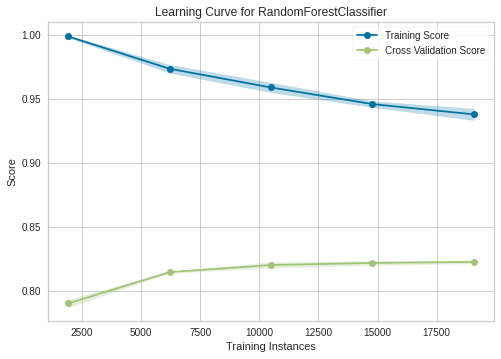

ValueError: ignored

In [19]:
from yellowbrick.model_selection import learning_curve
## selecting which model to run 
choice = "RF"
MLmodel = model(choice)
print(learning_curve(MLmodel, train_x, train_y, cv=2, scoring='accuracy'))